In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv("Water_purity.csv",encoding='unicode_escape')
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [11]:
data.shape

(3276, 10)

In [12]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [13]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [15]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [16]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

<Axes: >

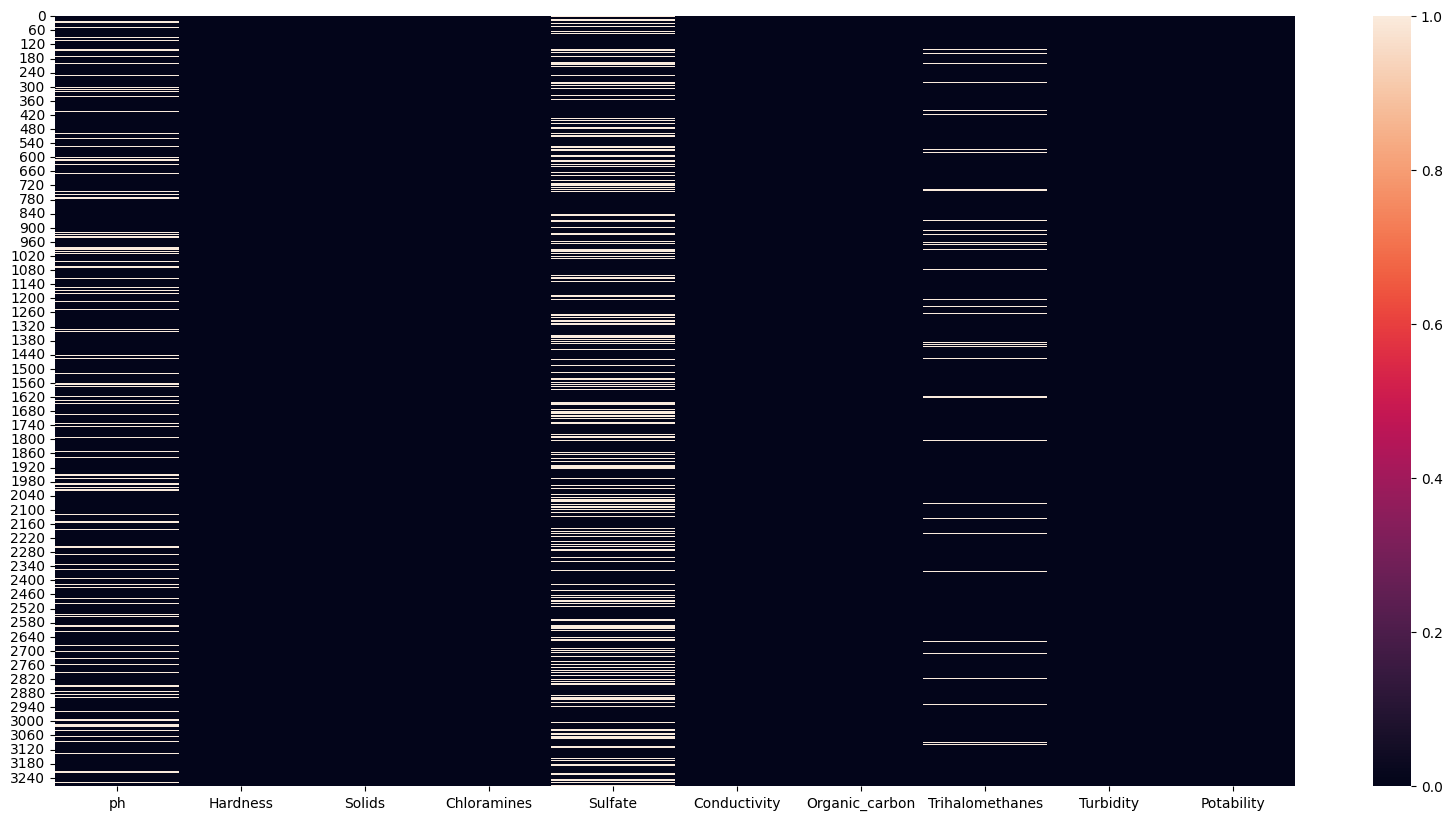

In [48]:
sns.heatmap(data.isnull())

<Axes: >

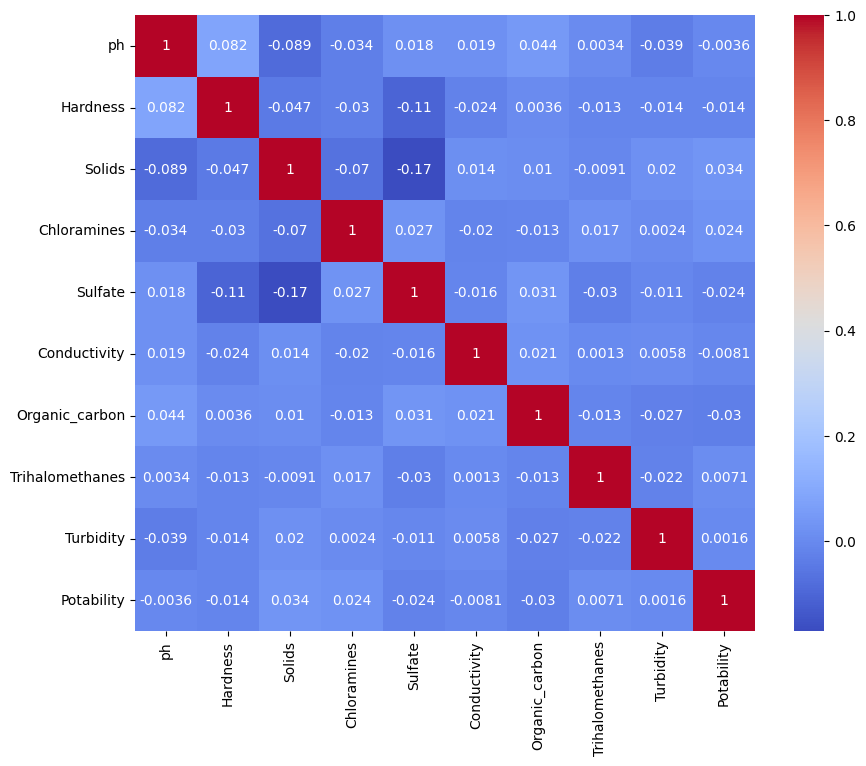

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [19]:
corr=data.corr()
c1=corr.abs().unstack()
c1.sort_values(ascending=False)[12:24:2]

Hardness  Sulfate           0.106923
ph        Solids            0.089288
Hardness  ph                0.082096
Solids    Chloramines       0.070148
Hardness  Solids            0.046899
ph        Organic_carbon    0.043503
dtype: float64

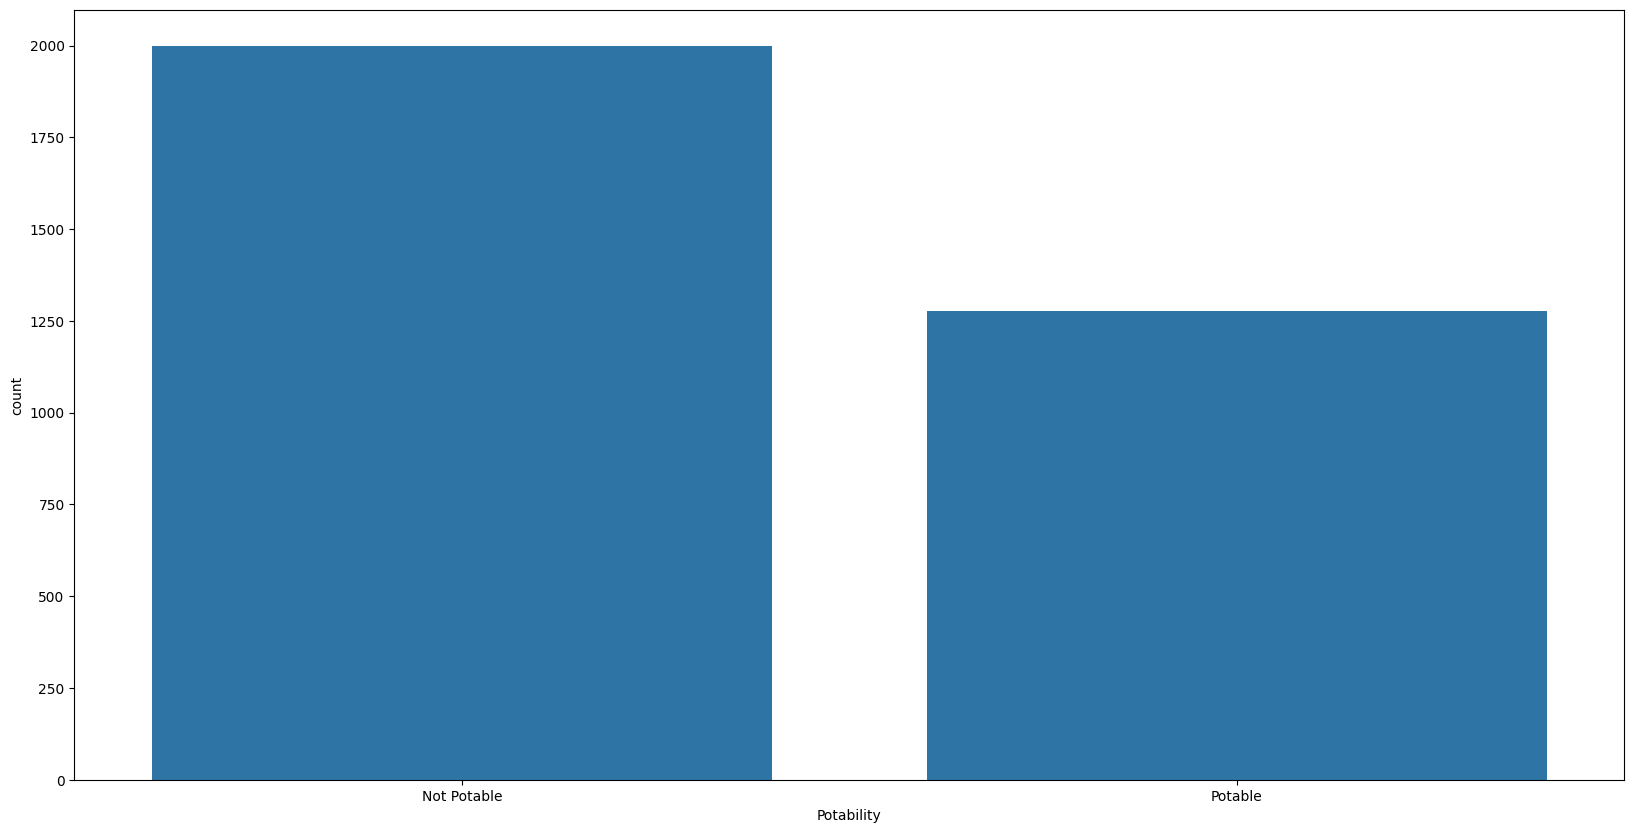

In [51]:
ax = sns.countplot(x = "Potability",data= data, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

In [20]:
x = data.Potability.value_counts()
labels = [0,1]
print(x)

Potability
0    1998
1    1278
Name: count, dtype: int64


C:\Users\Brijesh\AppData\Local\Temp\ipykernel_4764\3116655891.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Potability', y='ph', data=data, palette='rocket')


<Axes: xlabel='Potability', ylabel='ph'>

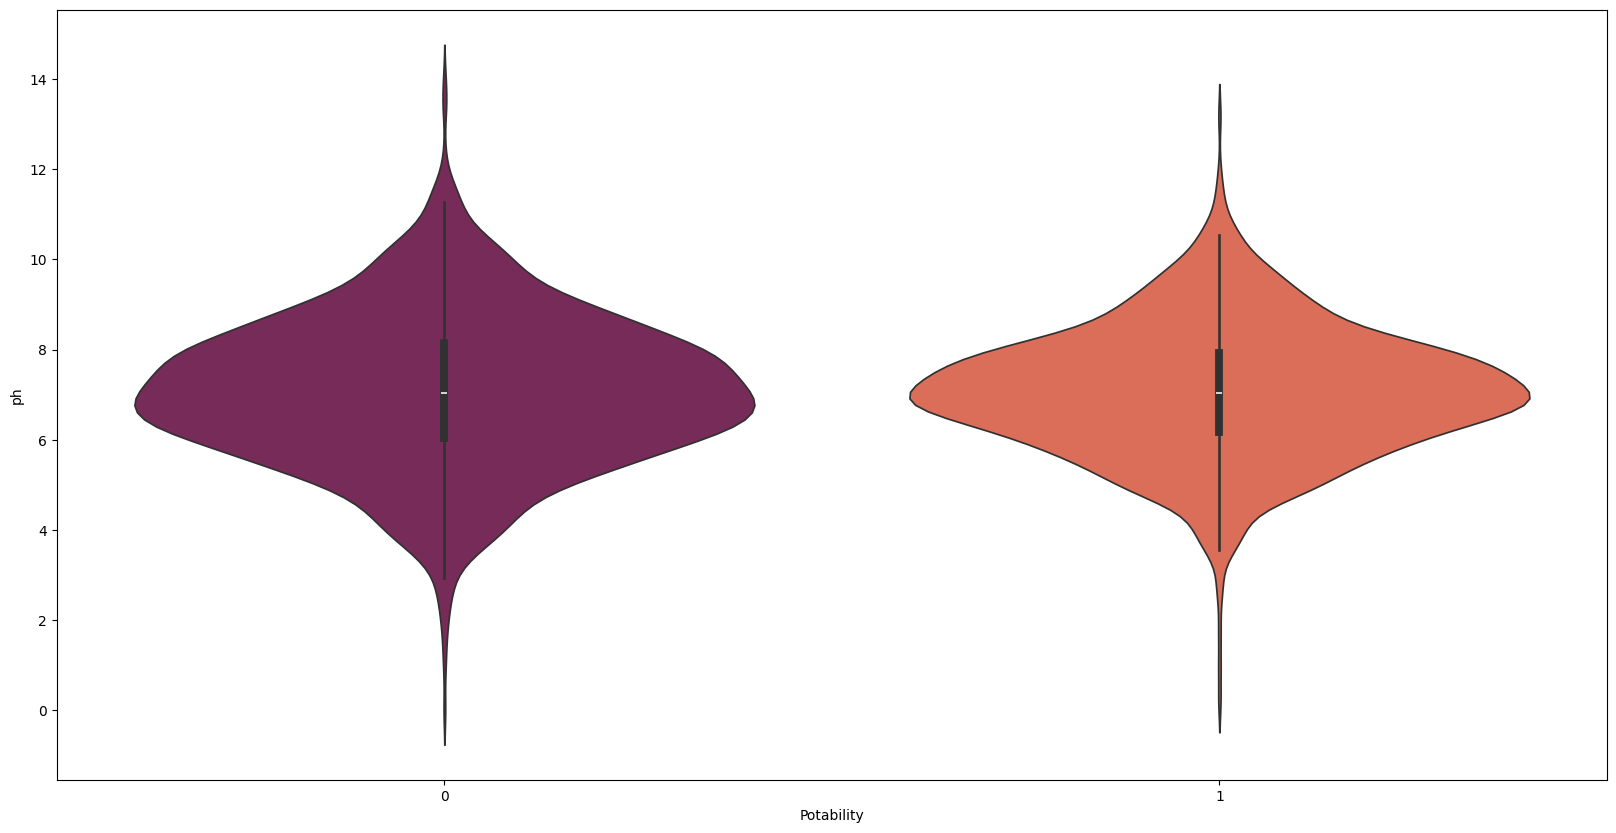

In [53]:
sns.violinplot(x='Potability', y='ph', data=data, palette='rocket')

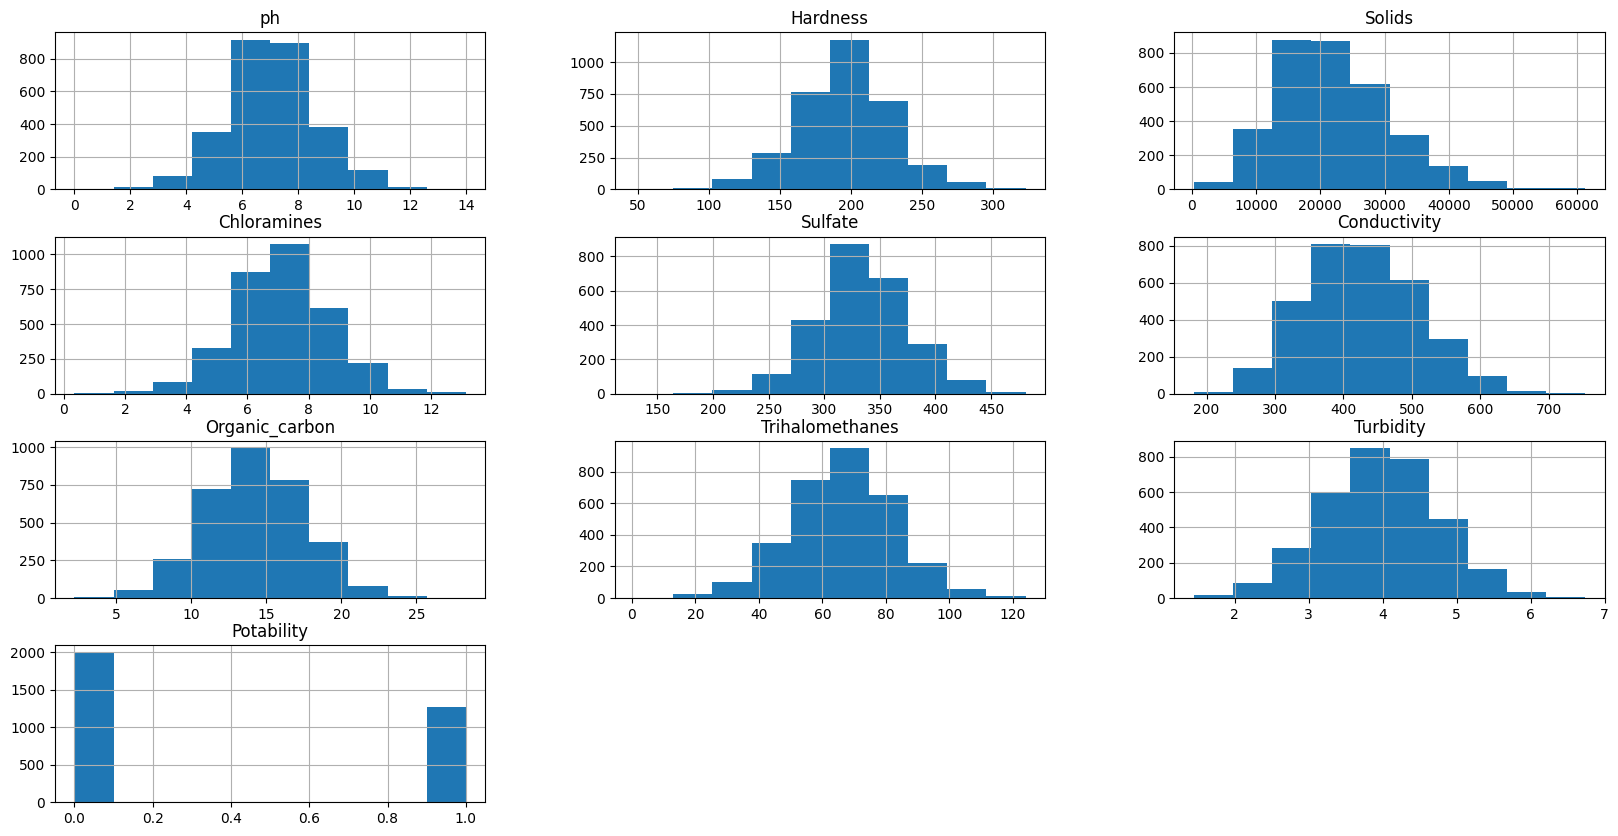

In [21]:
plt.rcParams['figure.figsize'] = [20,10]
data.hist()
plt.show()

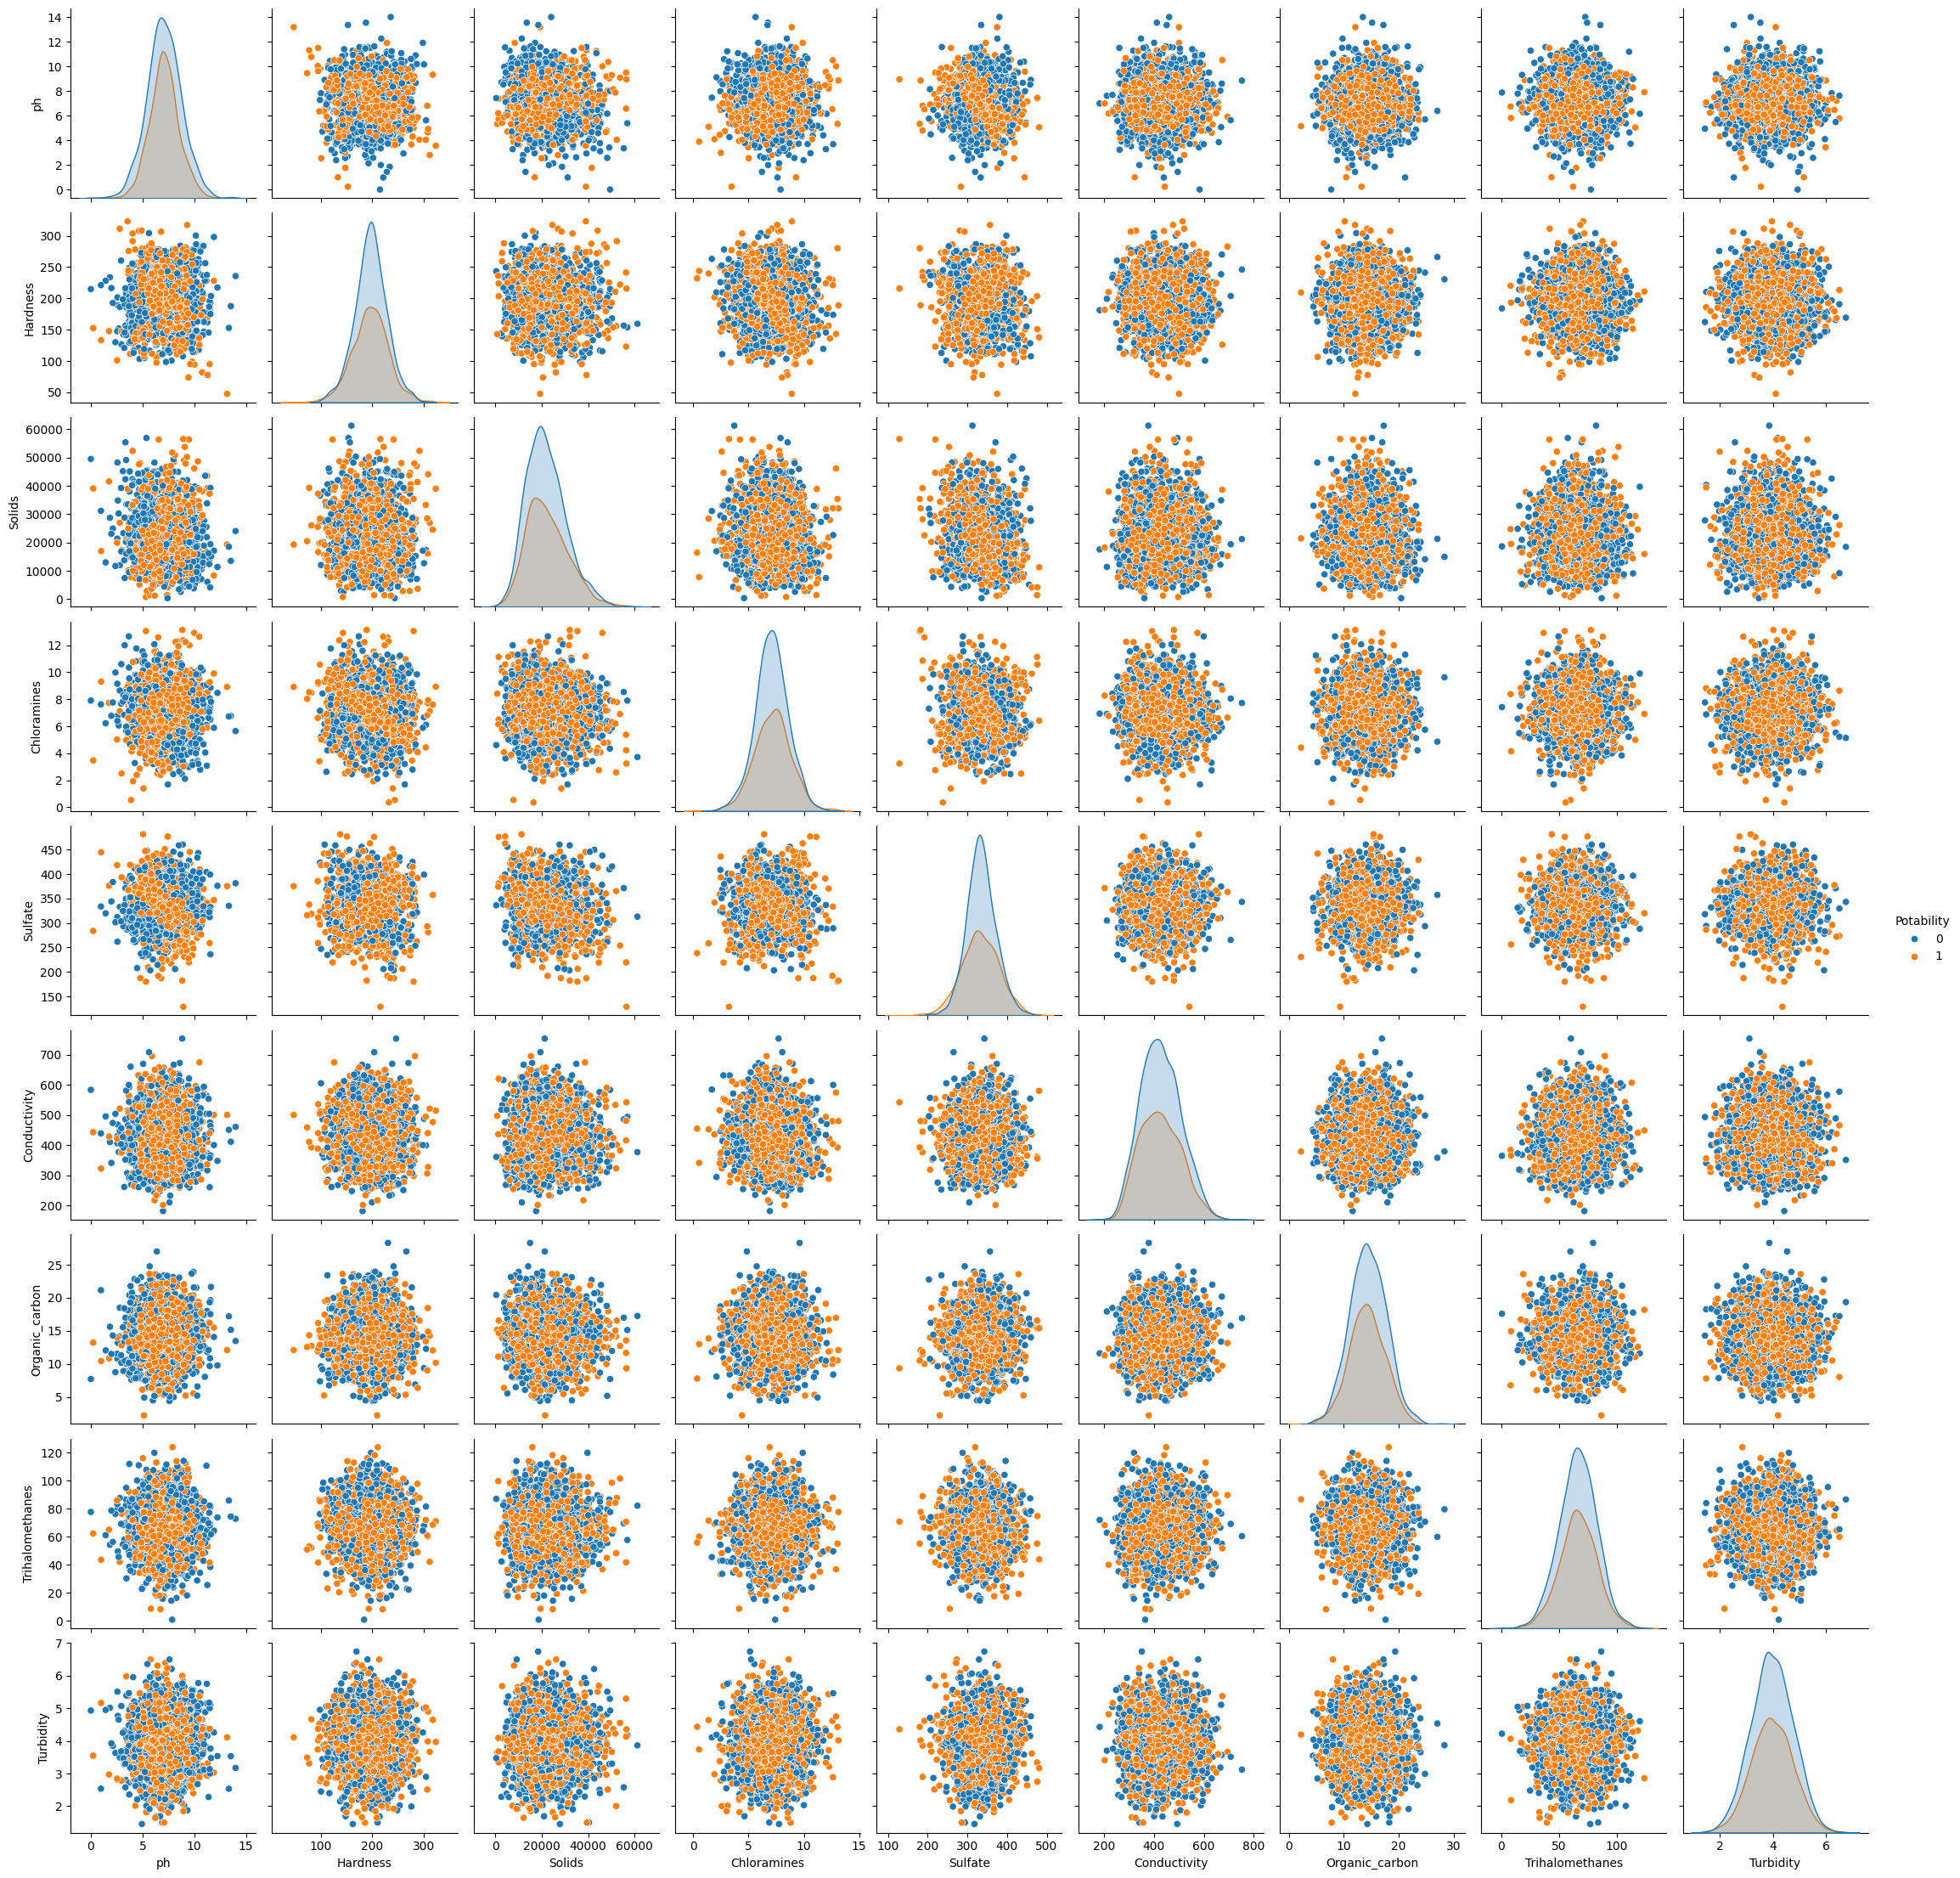

In [22]:
sns.pairplot(data, hue="Potability")

C:\Users\Brijesh\AppData\Local\Temp\ipykernel_10184\1940792010.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Potability'])


<Axes: xlabel='Potability', ylabel='Density'>

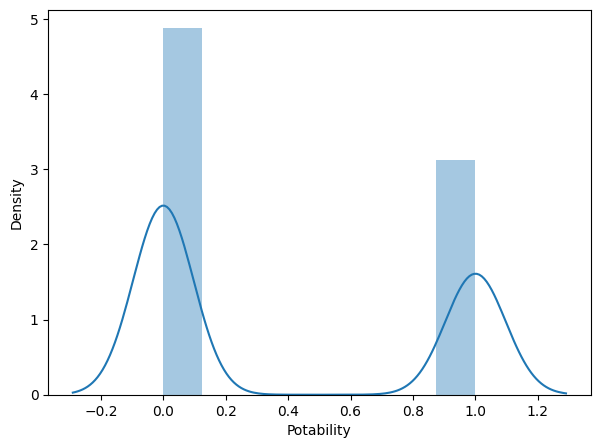

In [23]:
plt.rcParams['figure.figsize'] = [7,5]
sns.distplot(data['Potability'])

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

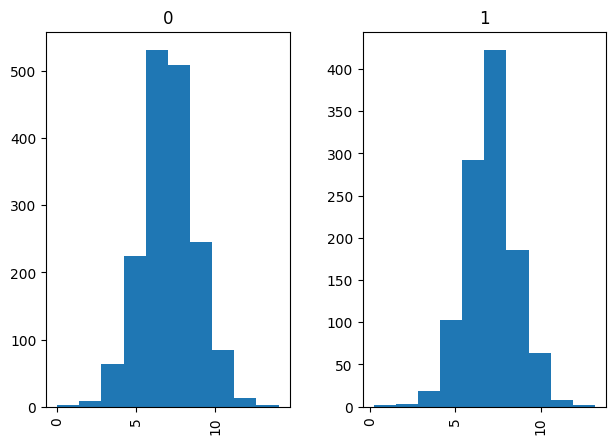

In [24]:
data.hist(column='ph',by='Potability')

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

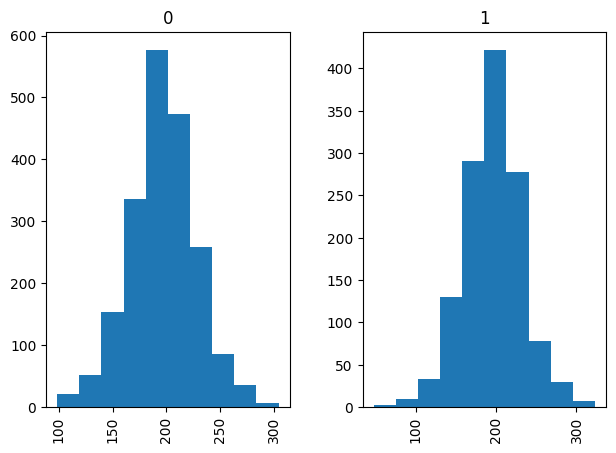

In [25]:
data.hist(column='Hardness', by='Potability')

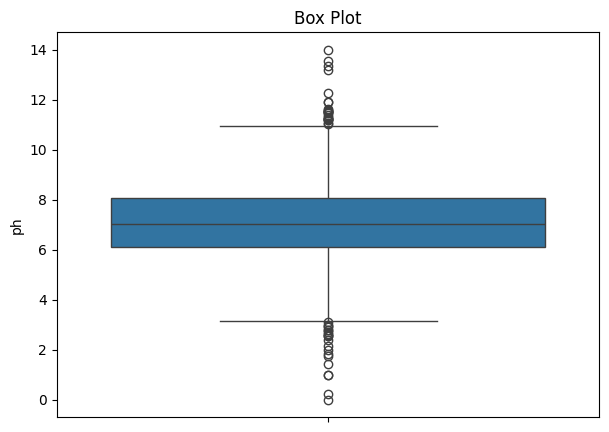

In [27]:
# Individual box plot for each feature
def Box(data):
    plt.title("Box Plot")
    sns.boxplot(data)
    plt.show()
Box(data['ph'])

<Axes: xlabel='Hardness', ylabel='Count'>

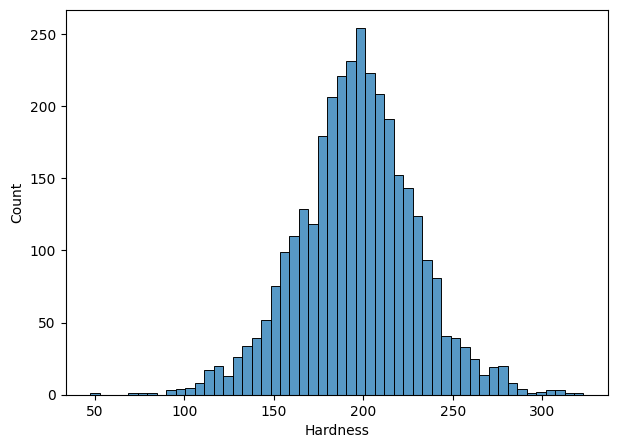

In [28]:
sns.histplot(x = "Hardness", data=data)

In [29]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [30]:
data.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

In [31]:
import plotly.express as px

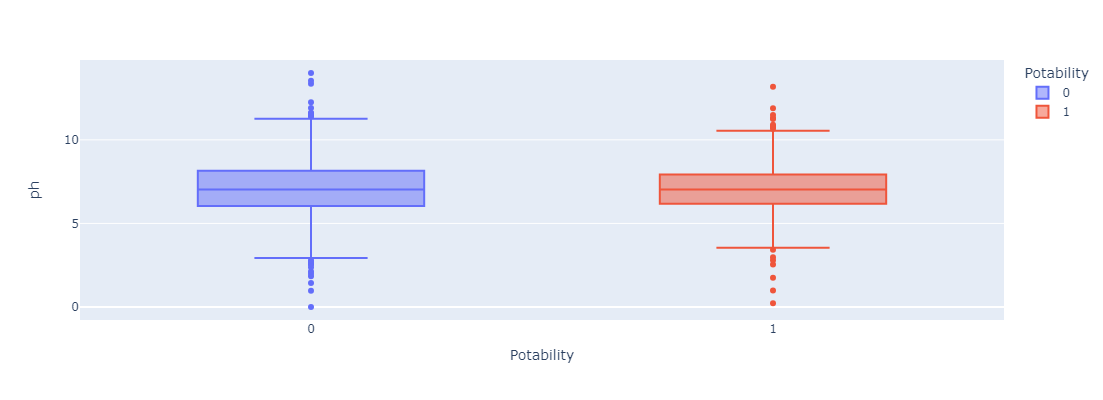

In [32]:
fig = px.box(data, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()

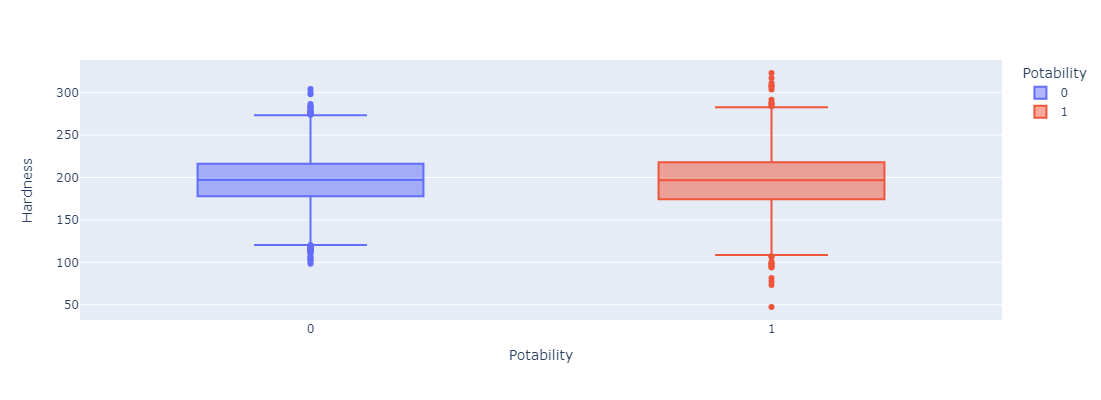

In [68]:
fig = px.box(data, x="Potability", y="Hardness", color="Potability", width=800, height=400)
fig.show()

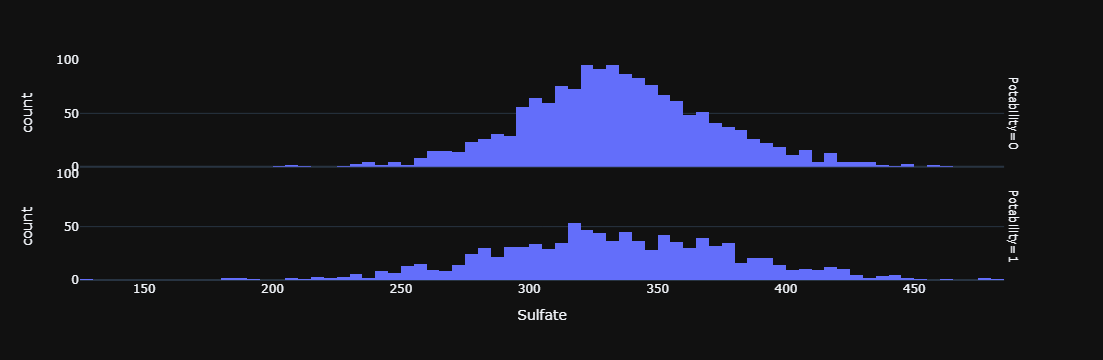

In [33]:
fig = px.histogram (data, x = "Sulfate",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

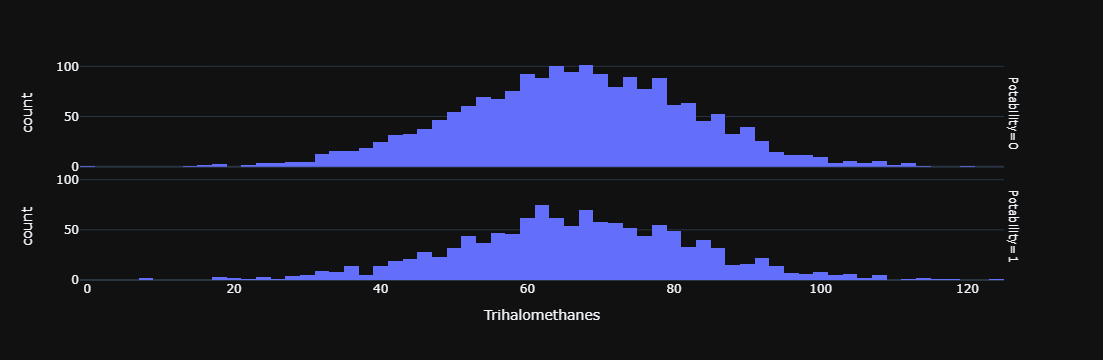

In [36]:
fig = px.histogram (data, x = "Trihalomethanes",  facet_row = "Potability",  template = 'plotly_dark')
fig.show ()

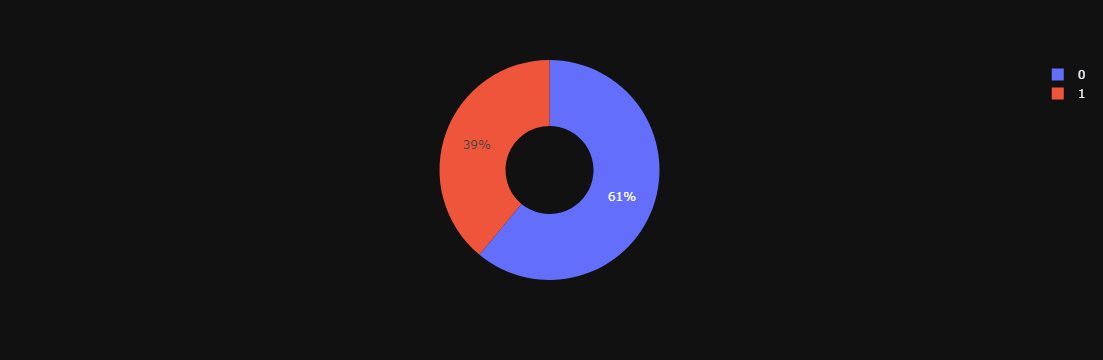

In [37]:
fig =  px.pie (data, names = "Potability", hole = 0.4, template = "plotly_dark")
fig.show ()

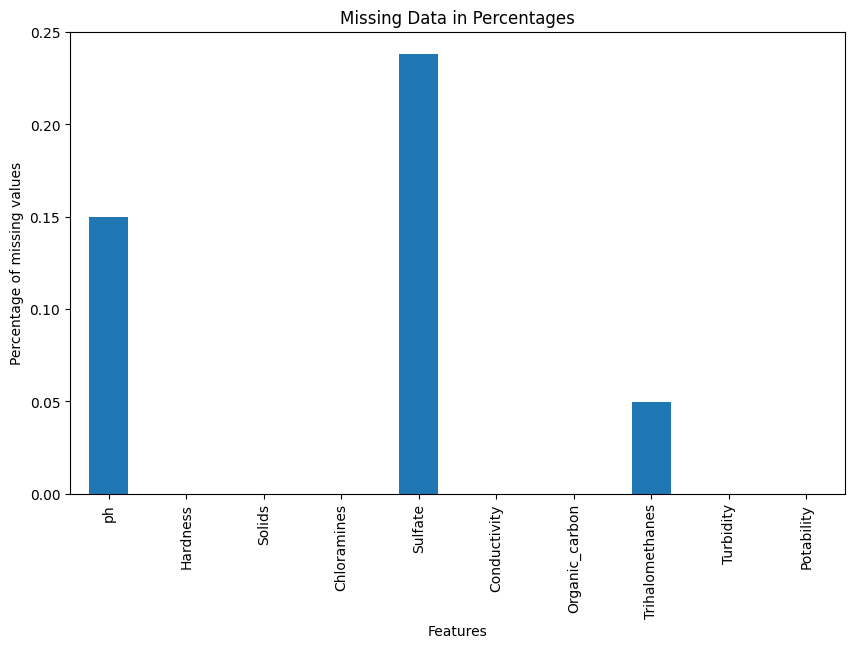

In [38]:
data.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [39]:
data['ph'] = data['ph'].fillna(data['ph'].mean())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].mean())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].mean())

In [40]:
data.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<Axes: >

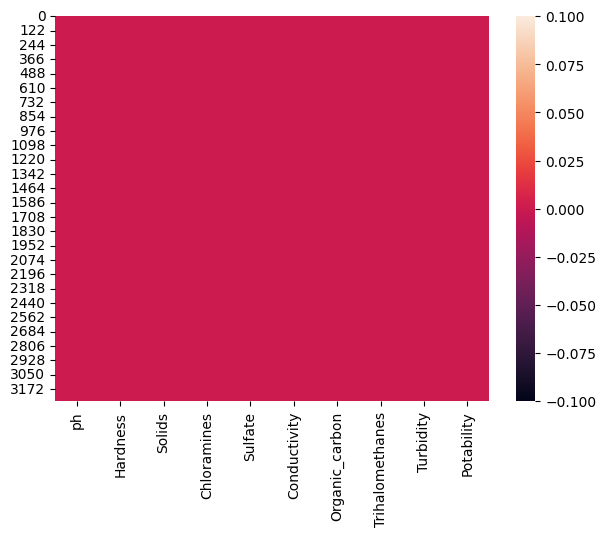

In [42]:
sns.heatmap(data.isnull())

In [43]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [44]:
x = data.drop('Potability', axis=1)
y = data['Potability']

In [45]:
x.shape

(3276, 9)

In [46]:
y.shape

(3276,)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
x=scaler.fit_transform(x)
x

array([[ 0.00000000e+00,  2.59194712e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
         2.70597241e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116858e-01,  1.50940874e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329233e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797384e-01],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         5.60940071e-01,  7.80223466e-01, -2.12445866e+00]])

In [49]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [51]:
x_train

array([[ 0.        , -1.16082577,  2.64951758, ...,  0.54457345,
        -0.81777252,  0.18208025],
       [ 0.72304962, -0.42394366, -1.2935108 , ..., -0.17100907,
         0.72129759, -1.7865197 ],
       [-1.15988267, -0.32940237,  1.5982591 , ..., -0.08480971,
         0.        , -0.43259224],
       ...,
       [-0.30647139, -0.29227326,  1.01798723, ..., -0.1418567 ,
         1.2910644 , -0.61030501],
       [ 1.15828844,  0.65896618, -0.6650338 , ...,  0.62568457,
        -1.22374139,  0.39390641],
       [-0.26034729,  0.05830532,  1.4442152 , ..., -0.63739737,
         0.        , -0.26735401]])

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
model=LogisticRegression(max_iter=20,random_state=0,n_jobs=20)

In [54]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=20, n_jobs=20, random_state=0)

In [57]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
lg=accuracy_score(y_test,pred)
lg

0.6284658040665434

In [60]:
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[680   0]
 [402   0]]


## Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model1=DecisionTreeClassifier(max_depth=4,random_state=42)

In [64]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [68]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [70]:
pred1=model1.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
dt=accuracy_score(y_test,pred1)
dt

0.6451016635859519

In [73]:
report=classification_report(y_test,pred1)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



In [74]:
matrix=confusion_matrix(y_test,pred1)
print(matrix)

[[609  71]
 [313  89]]


## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model2=RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [79]:
model2.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [80]:
pred2=model2.predict(x_test)
pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
rf=accuracy_score(y_test,pred2)
rf

0.6284658040665434

In [82]:
report=classification_report(y_test,pred2)
print(report)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Brijesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [83]:
matrix=confusion_matrix(y_test,pred2)
print(matrix)

[[680   0]
 [402   0]]


In [86]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:03
   ---------------------------------------- 0.1/99.8 MB 607.9 kB/s eta 0:02:44
   ---------------------------------------- 0.2/99.8 MB 583.1 kB/s eta 0:02:51
   ---------------------------------------- 0.2/99.8 MB 621.6 kB/s eta 0:02:41
   ---------------------------------------- 0.2/99.8 MB 654.9 kB/s eta 0:02:32
   ---------------------------------------- 0.3/99.8 MB 681.0 kB/s eta 0:02:27
   ---------------------------------------- 0.4/99.8 MB 794.9 kB/s eta 0:02:06
   ---------------------------------------- 0.4/99.8 MB 781.2 kB/s eta 0:02:08



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## xgBoost Classifier

In [87]:
from xgboost import XGBClassifier

In [88]:
model3=XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5)

In [89]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=5,
              num_parallel_tree=None, random_state=0, ...)

In [90]:
pred3=model3.predict(x_test)
pred3

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
xgb=accuracy_score(y_test,pred3)
xgb

0.6654343807763401

In [92]:
report=classification_report(y_test,pred3)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.60      0.29      0.39       402

    accuracy                           0.67      1082
   macro avg       0.64      0.59      0.58      1082
weighted avg       0.65      0.67      0.63      1082



In [93]:
matrix=confusion_matrix(y_test,pred3)
print(matrix)

[[603  77]
 [285 117]]


In [96]:
!pip install neighbors


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/893.8 kB ? eta -:--:--
     ---------------------------------------- 10.2/893.8 kB ? eta -:--:--
     ---------------------------------------- 10.2/893.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/893.8 kB 262.6 kB/s eta 0:00:04
     -- ---------------------------------- 61.4/893.8 kB 365.7 kB/s eta 0:00:03
     -- ---------------------------------- 71.7/893.8 kB 328.6 kB/s eta 0:00:03
     ---- ------------------------------- 122.9/893.8 kB 554.9 kB/s eta 0:00:02
     ------ ----------------------------- 153.6/893.8 kB 541.0 kB/s eta 0:00:02
     -------- --------------------------- 204.8/893.8 kB 657.3 kB/s eta 0:00:02
     --------- -------------------------- 235.5/893.8 kB 656.8 kB/s eta 0:00:02
     ----------- ------------------------ 286.7/893.8 kB 708.9 kB/s eta 0:00:01
     ------------ ----------------------- 317.4/893.8 kB 729.7 kB/s eta 0:00:01
     -------------- --------------------- 368.6/893.8 kB 7

## KNeighbour

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
model4=KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [102]:
model4.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [103]:
pred4=model4.predict(x_test)
pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
knn=accuracy_score(y_test,pred4)
knn

0.6534195933456562

In [105]:
report= classification_report(y_test,pred4)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       680
           1       0.55      0.37      0.44       402

    accuracy                           0.65      1082
   macro avg       0.62      0.60      0.59      1082
weighted avg       0.64      0.65      0.63      1082



In [106]:
matrix=confusion_matrix(y_test,pred4)
print(matrix)

[[559 121]
 [254 148]]


## SVM 

In [107]:
from sklearn.svm import SVC, LinearSVC

In [108]:
model5= SVC(kernel='rbf', random_state = 42)

In [109]:
model5.fit(x_train,y_train)

SVC(random_state=42)

In [110]:
pred5=model5.predict(x_test)
pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
svm=accuracy_score(y_test,pred5)
svm

0.6885397412199631

In [112]:
report=classification_report(y_test,pred5)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       680
           1       0.68      0.30      0.42       402

    accuracy                           0.69      1082
   macro avg       0.69      0.61      0.60      1082
weighted avg       0.69      0.69      0.65      1082



In [113]:
matrix=confusion_matrix(y_test,pred5)
print(matrix)

[[623  57]
 [280 122]]


## AddaBoost Classifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
model6=AdaBoostClassifier(learning_rate= 0.002,n_estimators= 205,random_state=42)

In [116]:
model6.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42)

In [117]:
pred6=model6.predict(x_test)
pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
ada=accuracy_score(y_test,pred6)
ada

0.634011090573013

In [119]:
report=classification_report(y_test,pred6)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.62      0.04      0.07       402

    accuracy                           0.63      1082
   macro avg       0.62      0.51      0.42      1082
weighted avg       0.63      0.63      0.51      1082



In [120]:
matrix=confusion_matrix(y_test,pred6)
print(matrix)

[[670  10]
 [386  16]]


Model  Accuracy_score
5                  SVM        0.688540
3              XGBoost        0.665434
4          KNeighbours        0.653420
1        Decision Tree        0.645102
6             AdaBoost        0.634011
0  Logistic Regression        0.628466
2        Random Forest        0.628466

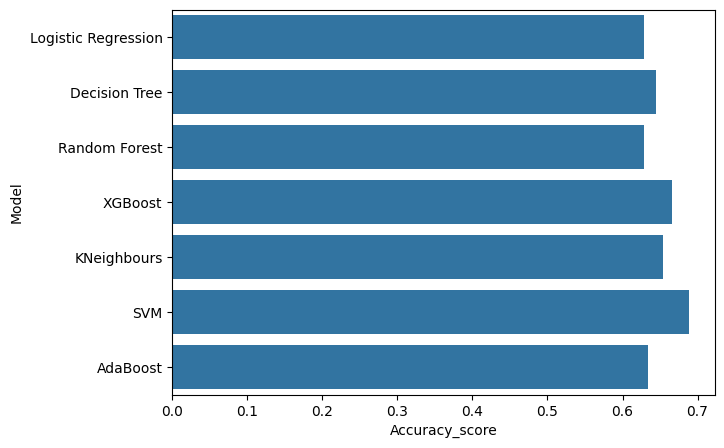

In [128]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM', 'AdaBoost'],
    'Accuracy_score' :[lg, dt, rf, xgb, knn, svm, ada]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)